# <span style='font-family:Georgia'> Geometric Brownian Motion
    
The definition is

$$S_{t}=S_{0}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)t+\sigma W_{t}\right)}\\
S_{T}=S_{t}\exp^{\left(\left(\mu -{\frac {\sigma ^{2}}{2}}\right)(T-t)+\sigma W_{T-t}\right)}\\
E(S_t)=S_0e^{(\mu-\sigma^2/2)t}E(e^{\sigma B_t}).$$

Since $E(e^{\sigma B_t})=e^{u^2/2}$ for every real number $u$ and every standard normal random variable $Z$, the identity $E(e^{\sigma B_t})=e^{\sigma^2 t/2}$ follows from the fact that σBt is distributed like $\sigma t \sqrt{Z}$. Simplifying, one gets the same expression of E(Xt) than by the direct route, namely,


$$E(X_t)=E(X_0)e^{\mu t}.$$

$$E(\frac{X_t}{X_0})=e^{\mu t}.$$

https://math.stackexchange.com/questions/176196/calculate-the-expected-value-of-y-ex-where-x-sim-n-mu-sigma2
https://quant.stackexchange.com/questions/32244/geometric-brownian-motion-percentage-returns-vs-log-returns
https://math.stackexchange.com/questions/40826/expectation-of-geometric-brownian-motion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
def gen_paths(S0, r, sigma, T, I):
    M = 500
    dt =T
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        print(paths)
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * 1 +
                                         sigma * np.sqrt(1) * rand)
        
    return paths

In [27]:
%%capture

S0 = 100.
r = 0.001
sigma = 0.01
T = 300.0
i = 1000

simulations = pd.DataFrame(gen_paths(S0, r, sigma, T, i))

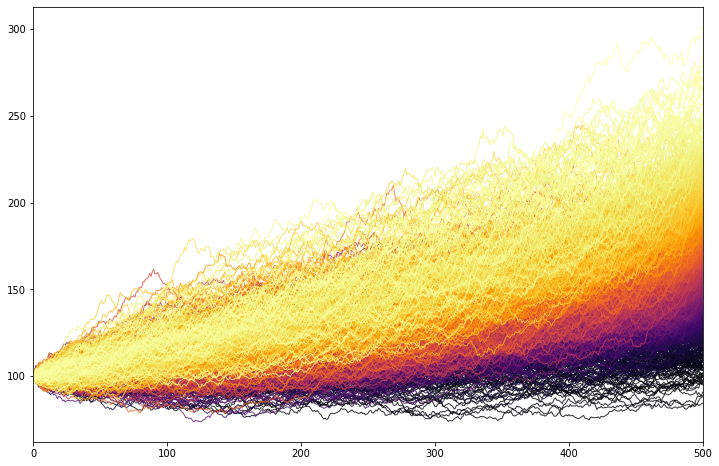

In [28]:
simulations.sort_values(simulations.index[-1], axis=1).plot(legend=False,
                                                            figsize=(12, 8), 
                                                            cmap='inferno', 
                                                            linewidth=1,
                                                            alpha=0.8)

In [13]:
np.log(simulations.iloc[-1]/100).std()

0.34448972671915146

Intuitively speaking, a “stationary” price series means that the prices diff use
from its initial value more slowly than a geometric random walk would. Mathematically,
we can determine the nature of the price series by measuring this speed of diffusion. The speed of diffusion can be characterized by the variance:

$$Var(\tau) = E(|z(t + \tau) − z(t)|^2)$$

where z is the log prices (z = log( y)), τ is an arbitrary time lag, and 〈…〉 is